# Task 1
Implement your own Scalar and Vector classes, without using any other modules:

In [ ]:
from typing import Union, List
from math import sqrt
class Scalar:
  pass
class Vector:
  pass

class Scalar:
  def __init__(self: Scalar, val: float):
    self.val = float(val)
  def __mul__(self: Scalar, other: Union[Scalar, Vector]) -> Union[Scalar, Vector]:
    # hint: use isinstance to decide what `other` is
    # raise an error if `other` isn't Scalar or Vector!
    if isinstance(other, Vector):
      res = []
      for i in range(len(other.entries)):
        res.append(self.val * other.entries[i])
      return Vector(*res)
    elif isinstance(other, Scalar):
        return Scalar(self.val * other.val)
    else:
      print("Not happening")
  def __add__(self: Scalar, other: Scalar) -> Scalar:
    return Scalar(self.val + other.val)
  def __sub__(self: Scalar, other: Scalar) -> Scalar:
    return Scalar(self.val - other.val)
  def __truediv__(self: Scalar, other: Scalar) -> Scalar:
    return Scalar(self.val / other.val)
  def __rtruediv__(self: Scalar, other: Vector) -> Vector:
    res = []
    for i in range(len(other)):
      x = other.entries[i]/self.val
      res.append(x)
    return Vector(*res)
  def __repr__(self: Scalar) -> str:
    return "Scalar(%r)" % self.val
  def sign(self: Scalar) -> int:
    if self.val == 0:
      return 0
    elif self.val < 0:
      return -1
    else:
      return 1
  def __float__(self: Scalar) -> float:
    return self.val

class Vector:
  def __init__(self: Vector, *entries: List[float]):
    self.entries = entries
  def zero(size: int) -> Vector:
    return Vector(*[0 for i in range(size)])
  def __add__(self: Vector, other: Vector) -> Vector:
    if len(self.entries) == len(other):
      res = []
      for i in range(len(self.entries)):
        res.append(self.entries[i] + other.entries[i])
    return Vector(*res)
  def __sub__(self: Vector, other: Vector) -> Vector:
    if len(self.entries) == len(other):
      res = []
      for i in range(len(self.entries)):
        res.append(self.entries[i] - other.entries[i])
    return Vector(*res)
  def __mul__(self: Vector, other: Vector) -> Scalar:
    res_v = 0
    if len(self.entries) == len(other.entries):
      for i in range(len(self.entries)):
        res_v += self.entries[i] * other.entries[i]
    return Scalar(res_v)
  def magnitude(self: Vector) -> Scalar:
    res = 0
    for i in range(len(self.entries)):
      res += self.entries[i]**2
    return Scalar(sqrt(res))
  def unit(self: Vector) -> Vector:
    return self / self.magnitude()
  def __len__(self: Vector) -> int:
    return len(self.entries)
  def __repr__(self: Vector) -> str:
    return "Vector%s" % repr(self.entries)
  def __iter__(self: Vector):
    return iter(self.entries)

# Task 2

Implement the PerceptronTrain and PerceptronTest functions, using your Vector and Scalar classes. Do not permute the dataset when training; run through it linearly.

(Hint on how to use the classes: make w and x instances of Vector, y and b instances of Scalar. What should the type of D be? Where do you see the vector operation formulas?)

In [ ]:
def PerceptronTrain(D, maxiter = 100):
  w = Vector.zero(len(D[0][0]))
  b = Scalar(0)

  for i in range(maxiter):
    for x, y in D:
      a = x*w + b
      if (y*a).sign() <= 0: 
        w += y*x
        b += y
  return w, b

In [ ]:
def PerceptronTest(w, b, D):
  res = []
  for x,y in D:
    a = x*w + b
    res.append(a.sign())
  return res

# Task 3 
Make a 90-10 test-train split and evaluate your algorithm on the following dataset:

You should get that w is some multiple of v, and the performance should be very good. (Some noise is introduced by the last factor in y.)

In [ ]:
from random import randint

v = Vector(randint(-100, 100), randint(-100, 100)) # random vector, gold hyperplane
xs = [Vector(randint(-100, 100), randint(-100, 100)) for i in range(500)]
ys = [v * x * Scalar(randint(-1, 9)) for x in xs] #v dot x -> perfect 

In [ ]:
def merge(list1, list2):       
    merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))] 
    return merged_list      

In [ ]:
from random import shuffle

def train_test(data, split, shuff = True):
  #shuffle the data
  if shuff:
    shuffle(data)

  b = int(len(data)*split)
  train = data[:b]
  test= data[b:]

  return train, test

In [ ]:
D = merge(xs, ys)

In [ ]:
train, test = train_test(D, 0.9, shuff = False)

In [ ]:
w1, b1 = PerceptronTrain(train)
y_pred = PerceptronTest(w1, b1, test)

In [ ]:
def score(y_pred, y_true):
  all = len(y_true)
  correct = 0
  for i in range(all):
    if y_pred[i] == y_true[i][1].sign():
      correct += 1
  return correct/all*100

In [ ]:
score(y_pred, test)

76.0

# Task 4
Make a 90-10 test-train split and evaluate your algorithm on the xor dataset:

You should get some relatively random w, and the performance should be terrible.

In [ ]:
xs_xor = [Vector(randint(-100, 100), randint(-100, 100)) for i in range(500)]
ys_xor = [Scalar(1) if x.entries[0]*x.entries[1] < 0 else Scalar(-1) for x in xs_xor]

In [ ]:
D_xor = merge(xs_xor, ys_xor)

In [ ]:
train_xor, test_xor = train_test(D_xor, 0.9, shuff = False)

In [ ]:
w2, b2 = PerceptronTrain(train_xor)
y_pred_xor = PerceptronTest(w2, b2, test_xor)

In [ ]:
score(y_pred_xor, test_xor)

50.0

# Task 5

Sort the training data from task 3 so that all samples with y < 0 come first, then all samples with y = 0, then all samples with y > 0. (That is, sort by y.)

Graph the performance (computed by PerceptronTest) on both train and test sets versus epochs for perceptrons trained on

* no permutation
* random permutation at the beginning
* random permutation at each epoch


In [ ]:
train_for_exp = train

In [ ]:
train_sorted = sorted(train, key= lambda x: x[1].val)

In [ ]:
performance = []

for i in range(1, 11):
  w, b = PerceptronTrain(train_sorted, maxiter=i)
  y_pr = PerceptronTest(w, b, test)
  performance.append(score(y_pr, test))

In [ ]:
performance_1 = []

for i in range(1, 11):
  shuffle(train_for_exp)
  w, b = PerceptronTrain(train_for_exp, maxiter=i)
  y_pr = PerceptronTest(w, b, test)
  performance_1.append(score(y_pr, test))

In [ ]:
def PerceptronTrainPermute(D, maxiter = 100):
  w = Vector.zero(len(D[0][0]))
  b = Scalar(0)

  for i in range(maxiter):
    shuffle(D)
    for x, y in D:
      a = x*w + b
      if (y*a).sign() <= 0: 
        w += y*x
        b += y
  return w, b

In [ ]:
performance_2 = []

for i in range(1, 11):
  w, b = PerceptronTrainPermute(train_for_exp, maxiter=i)
  y_pr = PerceptronTest(w, b, test)
  performance_2.append(score(y_pr, test))

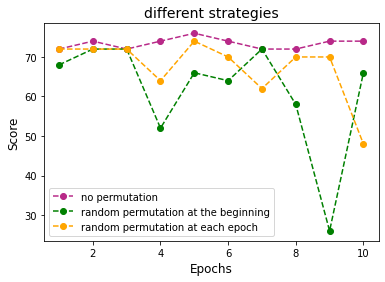

In [ ]:
import matplotlib.pyplot as plt

_ = plt.plot(list(range(1, 11)), performance, marker='o', linestyle='dashed', color = '#b82988', label = 'no permutation')
_ = plt.plot(list(range(1, 11)), performance_1, marker='o', linestyle='dashed', color = 'green', label = 'random permutation at the beginning')
_ = plt.plot(list(range(1, 11)), performance_2, marker='o', linestyle='dashed', color = 'orange', label = 'random permutation at each epoch')
_ = plt.xlabel('Epochs', fontsize=12)
_ = plt.ylabel('Score', fontsize=12)
_ = plt.legend()
_ = plt.title('different strategies', fontsize=14)
plt.show()

# Task 6

In [ ]:
def AveragedPerceptronTrain(D, maxiter = 100):
  w = Vector.zero(len(D[0][0]))
  b = Scalar(0)
  u = Vector.zero(len(D[0][0]))
  beta = Scalar(0)
  c = Scalar(1)
  for i in range(maxiter):
    shuffle(D)
    for x, y in D:
      a = x*w + b
      if (y*a).sign() <= 0: 
        w += y*x
        b += y
        u += y*c*x
        beta += y*c
      c += Scalar(1)
  return w-(Scalar(1)/c)*u, b-beta*(Scalar(1)/c)

In [ ]:
performance_3 = []

for i in range(1, 11):
  w, b = AveragedPerceptronTrain(train, maxiter=i)
  y_pr = PerceptronTest(w, b, test)
  performance_3.append(score(y_pr, test))

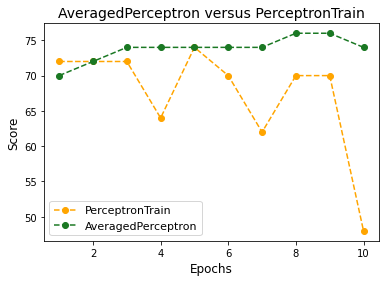

In [ ]:
_ = plt.plot(list(range(1, 11)), performance_2, marker='o', linestyle='dashed', color = 'orange', label = 'PerceptronTrain')
_ = plt.plot(list(range(1, 11)), performance_3, marker='o', linestyle='dashed', color = '#1a7823', label = 'AveragedPerceptron')
_ = plt.xlabel('Epochs', fontsize=12)
_ = plt.ylabel('Score', fontsize=12)
_ = plt.legend(fontsize=11)
_ = plt.title('AveragedPerceptron versus PerceptronTrain', fontsize=14)
plt.show()